# TERRORISM ACTIVITY HIGHLIGHTS, ANALYSIS AND PREDICTING FUTURE ATTACKS



* INTRODUCTION :

We have worked on a public dataset of global terrorist attacks which happened across the world. However, We would be concentrating mainly on terrorist attacks which happened in the United states for our analysis, visualization and building a model to predict the groups or terrorist outfits responsible for the particular attack based on the type and nature of attack, the weapons used, the location and other related variables associated with the attack.

We have taken the dataset from Data.Gov.The Global Terrorism Database is the most comprehensive unclassified database of terrorist attacks in the world. The National Consortium for the Study of Terrorism and Responses to Terrorism makes the data available through this site in an effort to increase understanding of terrorist violence, so that it can be more readily studied and defeated. This data is an open-source database, which provides information on domestic and international terrorist events around the world since 1970, and now includes more than 190,000 events. For each event, a wide range of information is available, including the date and location of the incident, the weapons used, nature of the target, the number of casualties, and – when identifiable – the group or individual responsible.

We have worked on descriptive analysis and Prediction of groups responsible for the particular terrorist attacks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wget
import seaborn as sns
from Capstone_module import heatmap, succ_fail, prep, predict, piechart_attacks_state, piechart_deaths_state

# DATASET IMPORT

In [2]:
trr_df = pd.read_excel('https://gtd.terrorismdata.com/app/uploads/_mediavault/2019/09/globalterrorismdb_0919dist.xlsx', sep='\t')
trr_df.dropna(how = 'all') #dropping all Nan rows 
trr_df.dropna(axis= 1, how = 'all') #dropping all Nan columns 
trr_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197000000002   1970       0     0        NaN         0        NaT      130   
2  197001000001   1970       1     0        NaN         0        NaT      160   
3  197001000002   1970       1     0        NaN         0        NaT       78   
4  197001000003   1970       1     0        NaN         0        NaT      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

* Code for Dataset Download

In [3]:
#pip install wget 
url = "https://gtd.terrorismdata.com/app/uploads/_mediavault/2019/09/globalterrorismdb_0919dist.xlsx"
wget.download(url)

'globalterrorismdb_0919dist (2).xlsx'

# DATA CLEANING

In [4]:
usa_df = trr_df.loc[(trr_df['country_txt'] == 'United States')] #Subsetting dataframe for prediction

In [5]:
trr_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'Country_code','country_txt':'Country','provstate':'State','nkill':'Killed',
                     'nwound':'Wounded','gname':'Group'
                     },inplace=True)  # Renaming the Requried Columns

trr_df1 = trr_df[['Year','Month','Day','Country','latitude','longitude','Killed','Wounded','Group']]
    #Taking only Required columns which we do discriptive analysis on from the 135 columns       
    
trr_df1['Killed'] = trr_df1['Killed'].fillna(0) #Replacing the Nan values with 0
trr_df1['Wounded'] = trr_df1['Wounded'].fillna(0) #Replacing the Nan values with 0
trr_df1['Casualties'] = trr_df1['Killed'] + trr_df1['Wounded'] #creating a new column named Casualties

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [6]:
us_df = trr_df1.loc[(trr_df1['Country'] == 'United States')] #Taking only United States data

In [7]:
us1_df = us_df[us_df['Group']!='Unknown'] #Removing the Unknown group data

In [8]:
us_df_n2001 = us1_df[us1_df['Year']!=2001] #Removing the 2001 data

In [9]:
us_df.head()

Year  Month  Day        Country   latitude   longitude  Killed  Wounded  \
5   1970      1    1  United States  37.005105  -89.176269     0.0      0.0   
7   1970      1    2  United States  37.791927 -122.225906     0.0      0.0   
8   1970      1    2  United States  43.076592  -89.412488     0.0      0.0   
9   1970      1    3  United States  43.072950  -89.386694     0.0      0.0   
10  1970      1    1  United States  43.468500  -89.744299     0.0      0.0   

                              Group  Casualties  
5                Black Nationalists         0.0  
7                           Unknown         0.0  
8                   New Year's Gang         0.0  
9                   New Year's Gang         0.0  
10  Weather Underground, Weathermen         0.0

In [10]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 5 to 190937
Data columns (total 10 columns):
Year          2926 non-null int64
Month         2926 non-null int64
Day           2926 non-null int64
Country       2926 non-null object
latitude      2925 non-null float64
longitude     2925 non-null float64
Killed        2926 non-null float64
Wounded       2926 non-null float64
Group         2926 non-null object
Casualties    2926 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 251.5+ KB


# DESCRIPTIVE ANALYSIS

In [11]:
from pandas import DataFrame
no_of_attacks_year = us_df['Year'].value_counts(sort=True)
df = DataFrame(no_of_attacks_year)
df.reset_index(inplace = True)
df = df.rename(columns = {'index':'Year','Year':'Attacks'})
df.sort_values(by=['Year'], inplace=True)
fig = plt.figure(figsize = (17,7))
plot = sns.barplot(df['Year'],df['Attacks'])
plot.set(xlabel="Year",ylabel="Number of Attacks in U.S",title="Number of Attacks from 1970 to 2018")
plot.set_xticklabels(df['Year'],rotation=90)
plt.show()

* The above bar graph shows the number of terrorist attacks which happened in USA from 1970 to 2018.

We could see that there were close to 500 terrorist attacks during 1970, which is the highest in the past 5 decades.There were more attacks during 1970s, which were mainly religious terrorism and dueto fight against government by extremist groups. Most of the terrorist activities during this time were iniated by Puerto rico separatist group called Fuerzas Armadas de Liberacion Nacional and a group called Jewish defense league. Some of the attacks were due to US invasion in cambodia during this period.

However, the number of attacks came down drastically by the end of 1970s compared to early 1970s.Also,the number of attacks remained less than 100 attacks from late 1970s to 2017. In 2018, there were more than 100 attacks after a long time,which were related to mass shootings in various parts of US.

Notably there were no attacks during the year 1993.

In [12]:
len(us_df['Group'].unique())

237

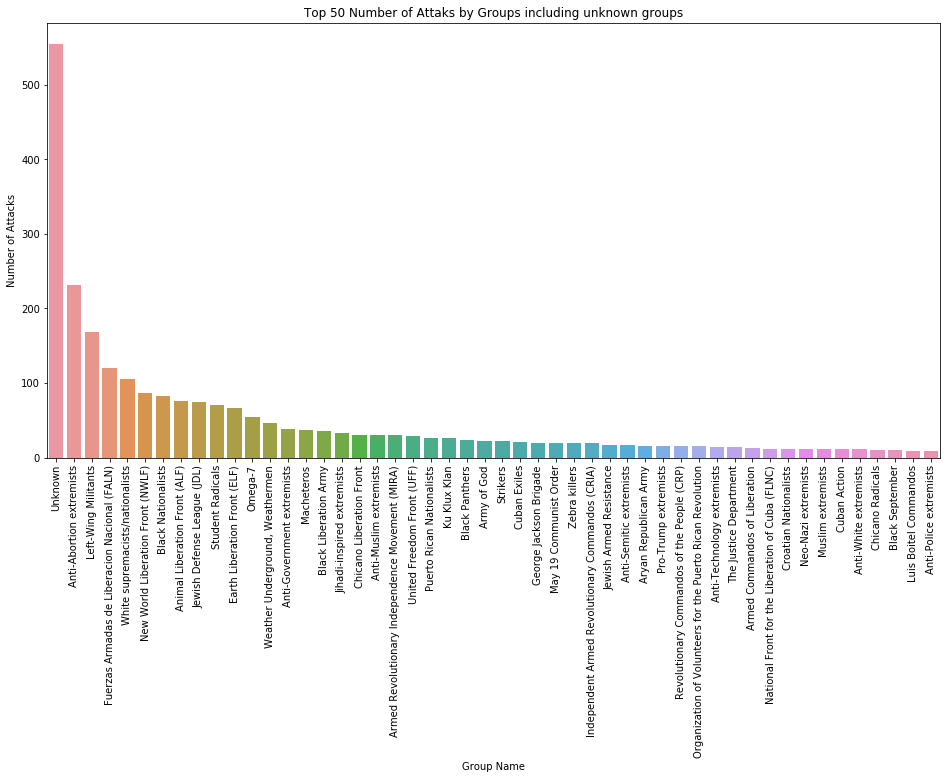

In [13]:
fig = plt.figure(figsize = (16,8))
no_of_classes = us_df['Group'].value_counts(sort=True)#returns counts of unique values
no_of_classes_sample = no_of_classes.sample(n=237)
no_of_classes_sample1 = no_of_classes_sample.sort_values(ascending = False)
no_of_classes_sample2 = no_of_classes_sample1.head(50)
p = sns.barplot(no_of_classes_sample2.index,no_of_classes_sample2)
p.set(xlabel="Group Name",ylabel="Number of Attacks")
p.set_title("Top 50 Number of Attaks by Groups including unknown groups")
p.set_xticklabels(no_of_classes_sample2.index,rotation=90)
plt.show()

In [14]:
fig = plt.figure(figsize = (16,8))
no_of_classes1 = us1_df['Group'].value_counts(sort=True)#returns counts of unique values
no_of_classes1_sample = no_of_classes1.sample(n=236)
no_of_classes1_sample1 = no_of_classes1_sample.sort_values(ascending = False)
no_of_classes1_sample2 = no_of_classes1_sample1.head(50)
p = sns.barplot(no_of_classes1_sample2.index,no_of_classes1_sample2)
p.set(xlabel="Group Name",ylabel="Number of Attacks")
p.set_title("Top 50 Number of Attaks by Groups without Unknown Groups")
p.set_xticklabels(no_of_classes1_sample2.index,rotation=90)
plt.show()

* The above bar charts shows the number of attacks performed by different terrorist outfits.

In the first chart the data includes unknown groups as weel and the second chart contains only the attacks performed by known groups.

We could see that most of the terrorist activities were performed by unknown groups. It was not possible to identify the groups behind the attack in more than 500 terrorist attacks.

Amoung the known terrorist outfits the white supremacists and Jewish Defence league are the prominents groups who carried out attacks majorly. 

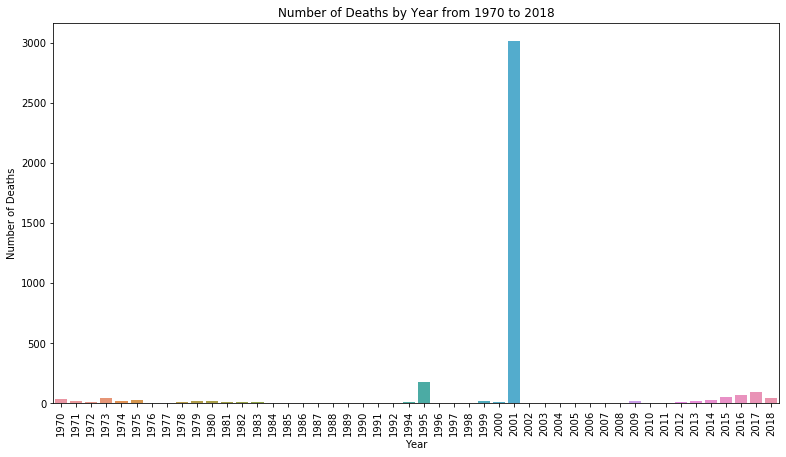

In [15]:
no_of_kills = us_df.groupby('Year')['Killed'].sum()
fig = plt.figure(figsize = (13,7))
plot1 = sns.barplot(no_of_kills.index,no_of_kills)
plot1.set_xlabel("Year")
plot1.set_ylabel("Number of Deaths")
plot1.set_title("Number of Deaths by Year from 1970 to 2018")
plot1.set_xticklabels(no_of_kills.index,rotation=90)
plt.show()

* The above bar chart shows the number of deaths caused by terrorist attacks from 1970 to 2018

While analyzing the number of deaths caused by terrorist attacks, we could see that the worst attack it terms of causaulities and death, it was the September 11 attack in 2001, which killed close to 3000 people.

The September 11 attacks were a series of four coordinated terrorist attacks by the Islamic terrorist group al-Qaeda. The attacks resulted in 2,977 deaths, and over 25,000 were injured. 

The other notable terrorist attack in terms of casualities was in 1995, at Oklahoma city. It was a bomb attack on the Alfred P. Murrah Federal Building in Oklahoma City, killing 168 people and injuring almost 700. 

In [16]:
no_of_cas = us_df.groupby('Year')['Casualties'].sum()
fig = plt.figure(figsize = (14,8))
plot1 = sns.barplot(no_of_cas.index,no_of_cas)
plot1.set_xlabel("Year")
plot1.set_ylabel("Number of Casualties")
plot1.set_title("Number of Casualties by Year from 1970 to 2018")
plot1.set_xticklabels(no_of_cas.index,rotation=90)
plt.show()

In [17]:
no_of_kills = us_df_n2001.groupby('Year')['Killed'].sum()
fig = plt.figure(figsize = (14,8))
plot1 = sns.barplot(no_of_kills.index,no_of_kills)
plot1.set_xlabel("Year")
plot1.set_ylabel("Number of Deaths")
plot1.set_title("Number of Deaths by Year without 2001")
plot1.set_xticklabels(no_of_kills.index,rotation=90)
plt.show()

In [18]:
no_of_cas = us_df_n2001.groupby('Year')['Casualties'].sum()
fig = plt.figure(figsize = (14,8))
plot1 = sns.barplot(no_of_cas.index,no_of_cas)
plot1.set_xlabel("Year")
plot1.set_ylabel("Number of Casualties")
plot1.set_title("Number of Casualties by Year without 2001")
plot1.set_xticklabels(no_of_cas.index,rotation=90)
plt.show()

In [19]:
fig = plt.figure(figsize = (14,6))
d3 = pd.DataFrame(us_df.groupby(['Year'])['Killed'].sum())
d3.reset_index(inplace=True)
d3['fake']=0
p = sns.tsplot(time="Year",value="Killed",data=d3,unit="fake")
p.set_title("Deaths in U.S")
p.set_xlabel("Year")
p.set_ylabel("Number of deaths")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


* The above Bar chart displays the top 20 states were majority of the terrorist attacks happened

We can see that Alabama, with around 600 attacks, is the state with more number of terrorist attacks, followed by Alaska. There are top two states and the other states have been comparitively attacked less, which are all under 300 attacks.

We could say that Alabama and Alaska are more prone to terrorist attacks, hence they would be considered as the most risky states, followed by Arizona, california and Colorado.

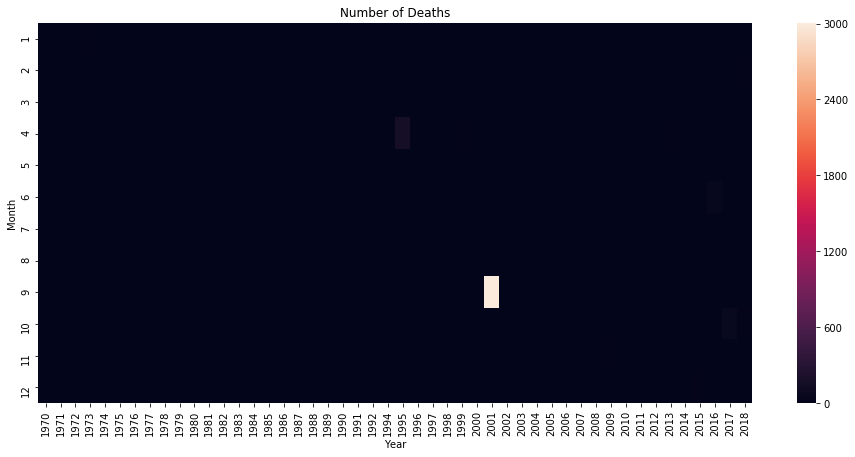

In [20]:
heatmap(us_df)

* The above heat map is a graphical representation of the number of deaths caused by terrorist attacks in USA.

We could clearly see that the heat map points out to the deaths in the 2001 caused by the September 11 attack.

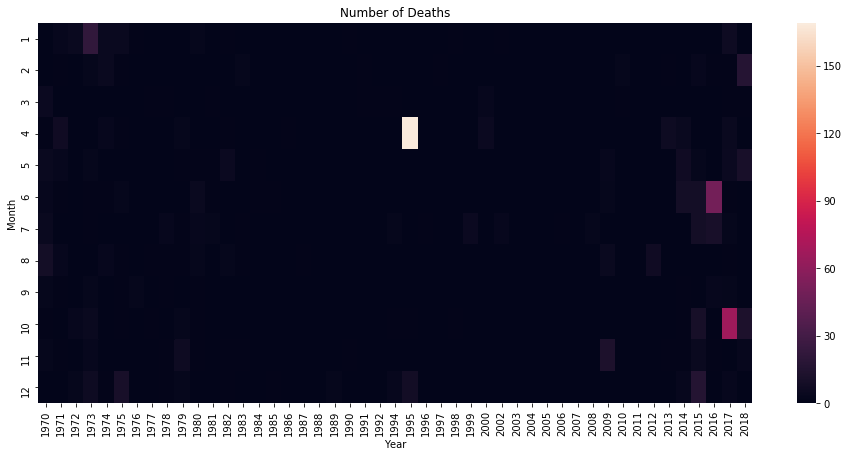

In [21]:
heatmap(us_df_n2001)

* Heatmap of deaths excluding year 2001.

* The above line graph shows the number of failed and successful terrorist attack attempts from 1970 to 2017.

We can see that there were around 2400 successful attempts and only about 500 attacks were failed. From the trend, we can see that the ratio between sucessfull and failed attempts drastically reduced over the years.In early 1970s we could see most of the attacks were successful and there were around 400 succesful attempts compared to around 80 failed attempts.
Over the years due to stringent measures by government and improved security, we could see that the number of attacks has reduced and also, the number of successful and failed attempts are very close, which means that the security measures have helped to stop attempts to attack and also the number of attacks has reduced.

In [22]:
def attacks_terr(data):
    plt.subplots(figsize=(15,10))
    d = pd.DataFrame(data.groupby(['Group','Year'])['Year'].count())
    d.columns=['Number_of_Attacks']
    d.reset_index(inplace=True)
    d2 = d.loc[d['Group'].isin(data['Group'].value_counts().sort_values(ascending=False).index[:10])]
    d2 = d2.pivot(index='Group',columns='Year',values='Number_of_Attacks').fillna(0)
    d2 = pd.DataFrame(d2.unstack(level=0))
    d2.reset_index(inplace=True)
    d2.columns=['Year','Terrorist Group','Number of Attacks']
    color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce"]
    d2['dummy']=0
    p = sns.tsplot(time='Year',value='Number of Attacks',condition='Terrorist Group',data=d2,unit='dummy',color = sns.color_palette(color_set))
    p.set_title("Activities of top 10 terrorist groups from 1970 to 2018")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


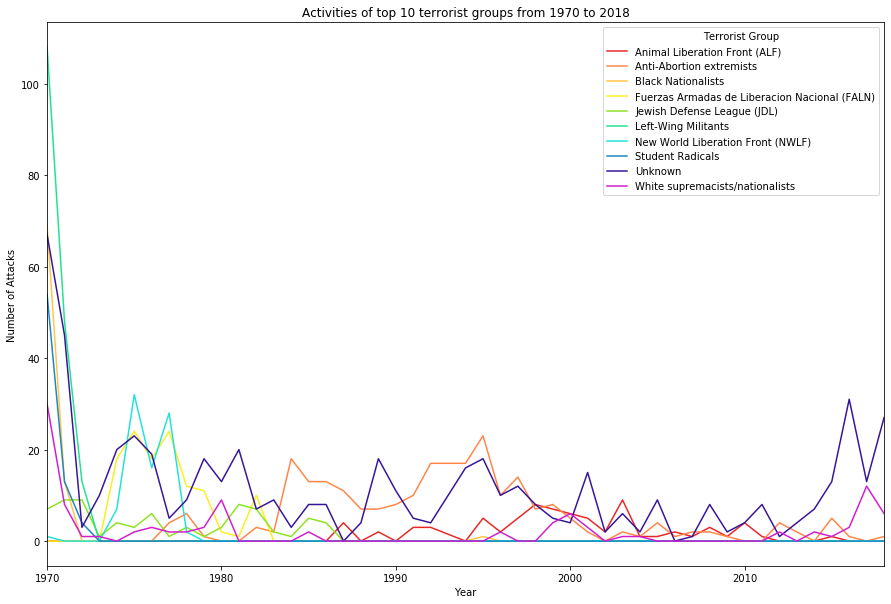

In [23]:
attacks_terr(us_df)

* From this time series plot we can see that the terrorist attacks have decreased drastically over the years from 1970 to 2018.

# HeatMap of Terrorist Attacks across United States

In [24]:
import folium
from folium.plugins import HeatMap

In [25]:
Map=folium.Map(location=[37.0902 , -95.7129 ],zoom_start=4.0)

In [26]:
heat_data = us_df[['latitude','longitude']]

In [27]:
heat_data1 = heat_data.dropna(how = 'any')
heat_data1.reset_index(inplace = True)
heat_data1 = heat_data1[['latitude','longitude']]
heat_data2 = heat_data1.loc[heat_data1['longitude'] < 0]
heat_data3 = heat_data1.loc[heat_data1['longitude'] > 0]

In [28]:
heat = [[row['latitude'],row['longitude']] for index, row in heat_data2.iterrows()]

In [29]:
HeatMap(heat).add_to(Map)
Map

* The above heatmap shows the terrorist attacks across the United States based on their geographical locations. We could see that the most attack prone states are on the east and west coastal areas, where there are the most developed cities.

# PREDICTION

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [55]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced')
tree = DecisionTreeClassifier(criterion="entropy")
gbm = GradientBoostingClassifier(learning_rate=0.2, max_depth=8)

In [56]:
threshold = 30

In [57]:
train, y_train, test, y_test = prep(usa_df,30)

/Users/shivrajchandran/Documents/Project/Analytics system tech _ boston terror attacks/Capstone_module.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weaptype1_txt'] = data['weaptype1_txt'].apply(lambda x: 'Vehicle' if x=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' else x)
/Users/shivrajchandran/Documents/Project/Analytics system tech _ boston terror attacks/Capstone_module.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['provstate'] = data.apply(lambda 

In [58]:
def predict(model,train,y_train,test,y_test):
    model.fit(train,y_train)
    ypred = model.predict(test)
    return f1_score(y_test,ypred,average='micro')

In [59]:
print ("F1-Score by Decision Tree, threshold =",threshold ,":" ,predict(tree,train, y_train, test, y_test))

F1-Score by Decision Tree, threshold = 30 : 0.6203703703703703


In [60]:
print ("F1-Score by Gradient Boosting Machine, threshold =",threshold ,":" ,predict(tree,train, y_train, test, y_test))

F1-Score by Gradient Boosting Machine, threshold = 30 : 0.6018518518518519


In [61]:
print ("F1-Score by Random Forest, threshold =",threshold ,":" ,predict(rf,train, y_train, test, y_test))

F1-Score by Random Forest, threshold = 30 : 0.7083333333333334


* Increasing Threshold value

In [62]:
threshold = 35

In [63]:
train, y_train, test, y_test = prep(usa_df,35)

/Users/shivrajchandran/Documents/Project/Analytics system tech _ boston terror attacks/Capstone_module.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weaptype1_txt'] = data['weaptype1_txt'].apply(lambda x: 'Vehicle' if x=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' else x)
/Users/shivrajchandran/Documents/Project/Analytics system tech _ boston terror attacks/Capstone_module.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['provstate'] = data.apply(lambda 

In [64]:
print ("F1-Score by Decision Tree, threshold =",threshold ,":" ,predict(tree,train, y_train, test, y_test))

F1-Score by Decision Tree, threshold = 35 : 0.7022222222222222


In [65]:
print ("F1-Score by Gradient Boosting Machine, threshold =",threshold ,":" ,predict(tree,train, y_train, test, y_test))

F1-Score by Gradient Boosting Machine, threshold = 35 : 0.6711111111111111


In [66]:
print ("F1-Score by Random Forest, threshold =",threshold ,":" ,predict(rf,train, y_train, test, y_test))

F1-Score by Random Forest, threshold = 35 : 0.7422222222222222


* Decreasing Threshold value

In [67]:
threshold = 25

In [68]:
train, y_train, test, y_test = prep(usa_df,25)

/Users/shivrajchandran/Documents/Project/Analytics system tech _ boston terror attacks/Capstone_module.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weaptype1_txt'] = data['weaptype1_txt'].apply(lambda x: 'Vehicle' if x=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' else x)
/Users/shivrajchandran/Documents/Project/Analytics system tech _ boston terror attacks/Capstone_module.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['provstate'] = data.apply(lambda 

In [69]:
print ("F1-Score by Decision Tree, threshold =",threshold ,":" ,predict(tree,train, y_train, test, y_test))

F1-Score by Decision Tree, threshold = 25 : 0.6568627450980392


In [70]:
print ("F1-Score by Gradient Boosting Machine, threshold =",threshold ,":" ,predict(tree,train, y_train, test, y_test))

F1-Score by Gradient Boosting Machine, threshold = 25 : 0.6715686274509803


In [71]:
print ("F1-Score by Random Forest, threshold =",threshold ,":" ,predict(rf,train, y_train, test, y_test))

F1-Score by Random Forest, threshold = 25 : 0.7450980392156863


In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
nn = MLPClassifier(activation='relu',alpha=0.01,hidden_layer_sizes=(20,10))

In [74]:
print ("F1-Score by Neural Network, threshold =",threshold ,":" ,predict(nn,train, y_train, test, y_test))

F1-Score by Neural Network, threshold = 25 : 0.14215686274509803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


* From the comparision all the above models and threshold values we can conclude that Random Forest Classification with threshold value 25 is the best prediction model with accuracy around 75

* This model can be used to predict the terrorist groups responsible for particular terrorist attack, based on the day of the attack, location, target of the attack and weapons used for the attack.

# CONCLUSION

From the Global terrorist database, focussing on the terrorist attacks in The United States, we analyzeD the trend of terrorist attacks for the last five decades through which we understand the major terrorist attacks which happened in USA, the nature of attacks, weapons used, location of the attack and the number of casualities in the attacks. Based on the these variables, we predicted the groups behind the terrorist attacks. 

This dataset will be helpful and security and Investigation authorities to see the trend of attacks and thereby analyze and predict the possible attacks in future, to understand the states more prone to attacks and thereby improve security measures and more importantly predict who is responsible for a particular attack with the predictive learning based on the data of past attacks.